In [51]:
FILENAME = "san_jose_graph.json"

In [52]:
import json
import numpy as np
from numpy.linalg import matrix_power
import scipy.sparse.linalg as sla
from numpy import linalg as LA

with open(FILENAME, "r") as f:
  graph = json.loads(f.read())


to_remove = []
for key, _ in graph.items():
    m = 0
    for u in graph[key]:
        if u not in graph:
          continue
        m += 1
    if m == 0:
        to_remove.append(key)

for key in to_remove:
    del graph[key]

n = len(graph)

# doc to doc id
next_id = 0
doc_to_id = {}
doc_names = []
for key, _ in graph.items():
  doc_to_id[key] = next_id
  doc_names.append(key)
  next_id+=1

A = np.zeros(shape=(n,n))
# construct markov matrix
for doc, neighbor in graph.items():
  m = 0
  for u in neighbor:
    if u not in doc_to_id:
      continue
    m += 1
  for u in neighbor:
    if u not in doc_to_id:
      continue
    A[doc_to_id[doc]][doc_to_id[u]] = 1.0/m

Aa = A * 0.8 + 0.2 * (1.0/n)

# use transpose since scipy is calculating "right" eigenvector by default.
eigenvalue, eigenvector = sla.eigs(Aa.T, k=1, which='LM')
x = (eigenvector/eigenvector.sum()).real.flatten()
ranks = np.argsort(x)[::-1]

In [41]:
ranks_to_show = ranks[40:]

In [42]:
from pyvis.network import Network

net = Network(notebook=True)
added = set()
ii = 0
for r in ranks_to_show:
  r = int(r)
  net.add_node(r, label=doc_names[r], value=n-ii)
  added.add(r)
  ii+=1

for r in ranks_to_show:
  r = int(r)
  neighbor = graph[doc_names[r]]
  for u in neighbor:
    if u not in doc_to_id:
      continue
    if doc_to_id[u] not in added:
      continue
    net.add_edge(r, doc_to_id[u])

net.show("hi.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [43]:
A

array([[0.        , 0.0125    , 0.0125    , ..., 0.0125    , 0.0125    ,
        0.0125    ],
       [0.        , 0.        , 0.        , ..., 0.14285714, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0625    , 0.        ,
        0.        ],
       ...,
       [0.        , 0.05882353, 0.        , ..., 0.        , 0.05882353,
        0.05882353],
       [0.05555556, 0.        , 0.05555556, ..., 0.05555556, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.        ,
        0.        ]])

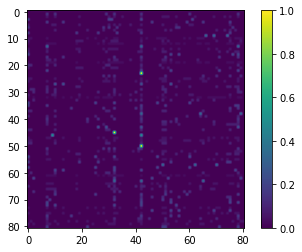

In [44]:
import matplotlib.pyplot as plt
plt.imshow(A)
plt.colorbar()
plt.show()

In [45]:
# Ax = 1 * x
eigenvalue

array([1.+0.j])

In [46]:
x

array([0.02221819, 0.01096083, 0.00960263, 0.00269132, 0.00269132,
       0.00269132, 0.00269132, 0.04922306, 0.00978255, 0.00900915,
       0.03065969, 0.00324239, 0.00269132, 0.00859611, 0.00269132,
       0.00518833, 0.00601931, 0.00269132, 0.01258891, 0.01499395,
       0.00368473, 0.00269132, 0.01363069, 0.00269132, 0.00324239,
       0.0101523 , 0.01390471, 0.00269132, 0.02238537, 0.01441842,
       0.01742513, 0.00711407, 0.04744727, 0.00980718, 0.00549188,
       0.00376217, 0.00269132, 0.00269132, 0.00542653, 0.00294385,
       0.00719472, 0.01474704, 0.08787398, 0.00356442, 0.00436765,
       0.00452927, 0.01070734, 0.00281797, 0.00780252, 0.00716954,
       0.03281592, 0.03581667, 0.00473503, 0.02744317, 0.00269132,
       0.01395318, 0.01879446, 0.00294385, 0.0062903 , 0.00555857,
       0.01586997, 0.00446681, 0.00420901, 0.00719312, 0.01206951,
       0.01091384, 0.00657433, 0.00806436, 0.00657673, 0.02250601,
       0.01511804, 0.00778396, 0.00616715, 0.00837259, 0.02247

In [53]:
for r in ranks:
  print(doc_names[r] + " " + str(np.round(x[r] * 100,5)) + "%")

California 3.06274%
San_Jose,_California 2.93344%
Mexico 1.81975%
United_States_Census_Bureau 1.74963%
San_Francisco 1.61378%
Los_Angeles 1.61303%
Spanish_Empire 1.35455%
U.S._state 1.35445%
San_Francisco_Bay_Area 1.1745%
Mexican%E2%80%93American_War 1.152%
Catholic_Church 1.0844%
Spanish_language 1.07736%
Alta_California 1.07698%
Democratic_Party_(United_States) 1.07401%
Silicon_Valley 0.93377%
Mexican_War_of_Independence 0.90409%
Admission_to_the_Union 0.79519%
San_Diego 0.78623%
Mexico_City 0.7327%
North_America 0.71217%
Apple_Inc. 0.67655%
Santa_Clara_County,_California 0.67092%
San_Francisco_Bay 0.65698%
Sacramento,_California 0.62959%
Stanford_University 0.62876%
Semi-arid_climate 0.62326%
Google 0.60455%
Oakland,_California 0.60189%
First_Mexican_Empire 0.58488%
Treaty_of_Guadalupe_Hidalgo 0.57771%
Portland,_Oregon 0.57032%
K%C3%B6ppen_climate_classification 0.54176%
Americans 0.54143%
Santa_Clara,_California 0.52406%
Seattle 0.52302%
Viceroyalty_of_New_Spain 0.51944%
California